In [17]:
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [13]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
%cd 'drive/MyDrive/Github/master_thesis'

[Errno 2] No such file or directory: 'drive/MyDrive/Github/master_thesis'
/home/anuar/PycharmProjects/master-thesis/clustering


In [2]:
%cd ..

/home/anuar/PycharmProjects/master-thesis


# Import Data

In [153]:
df = pd.read_csv('data/220216_preprocessed_data_missing_data.csv')
df.head()

gender  postnr   region  Q1_2_covid_is_threat  Q2_1_easy_to_follow_advice  \
0    Man    2830  Capital              4.796778                         5.0   
1  Woman    4654  Zealand              7.000000                         7.0   
2  Woman    7451  Central              7.000000                         7.0   
3    Man    4700  Zealand              6.000000                         1.0   
4    Man    4000  Zealand              5.000000                         1.0   

   Q2_2_can_follow_advice_if_wanted  Q2_3_if_follow_advice_safe  \
0                               7.0                         4.0   
1                               7.0                         5.0   
2                               7.0                         7.0   
3                               7.0                         2.0   
4                               1.0                         2.0   

   Q2_4_if_follow_advice_others_safe  \
0                                7.0   
1                                7.0   
2                                7.0   
3                                1.0   
4                                1.0   

   Q2_5_follow_advice_relationships_impared  Q2_6_follow_advice_life_degraded  \
0                                       4.0                               5.0   
1                                       6.0                               5.0   
2                                       4.0                               3.0   
3                                       7.0                               4.0   
4                                       2.0                               2.0   

   ...  Q14_ocupation_employee_private  Q14_ocupation_unemployed  \
0  ...                               0                         0   
1  ...                               0                         0   
2  ...                               0                         0   
3  ...                               0                         0   
4  ...                               0                         0   

   Q14_ocupation_employee_public  Q14_ocupation_self_employed  \
0                              1                            0   
1                              1                            0   
2                              1                            0   
3                              0                            0   
4                              0                            0   

   Q14_ocupation_student  Q14_ocupation_other  Q15_economic_spectrum  \
0                      0                    0                    2.0   
1                      0                    0                    2.0   
2                      0                    0                    NaN   
3                      0                    0                    NaN   
4                      0                    1                    2.0   

   Q15_social_spectrum  Q16_economic_spectrum  Q16_social_spectrum  
0                  4.0                    4.0                  2.0  
1                  4.0                    2.0                  4.0  
2                  NaN                    NaN                  NaN  
3                  NaN                    NaN                  NaN  
4                  4.0                    NaN                  NaN  

[5 rows x 56 columns]

In [8]:
df.columns.tolist()

['gender',
 'postnr',
 'region',
 'Q1_2_covid_is_threat',
 'Q2_1_easy_to_follow_advice',
 'Q2_2_can_follow_advice_if_wanted',
 'Q2_3_if_follow_advice_safe',
 'Q2_4_if_follow_advice_others_safe',
 'Q2_5_follow_advice_relationships_impared',
 'Q2_6_follow_advice_life_degraded',
 'Q3_1_aware_hand_hygiene',
 'Q3_2_avoid_contact',
 'Q3_3_ensure_frequent_cleaning',
 'Q3_4_avoid_risk_groups',
 'Q3_5_keep_distance',
 'Q3_6_avoid_crowds',
 'Q3_7_minimize_activities_w_contact',
 'Q5_4_yourself_kept_distance',
 'Q5_5_feel_urge_scold',
 'Q6_2_advices_important',
 'Q6_3_others_can_avoid_spreading',
 'Q6_5_ownership_of_advice',
 'Q6_6_clear_information_on_advice_reason',
 'Q6_7_advice_limits_daily_activities',
 'Q6_9_trust_political_strategy',
 'Ny1_nr_times_wearing_masks_last_week',
 'Q7_1_last_week_fever',
 'Q7_2_last_week_cough',
 'Q7_3_last_week_sore_throat',
 'Q7_4_last_week_no_smell_taste',
 'Q7_5_last_week_shortness_breath',
 'Q2020NovNy1',
 'Q2020NovNy2_tested_positive',
 'Q2020NovNy3',
 'Q2

## Extract non behavioural columns

In [40]:
 # 'Timings_yyyymmdd','timestamp',
non_behaviour_cols = ['gender','postnr', 'region',  'season','Q10_education', 'Q11_nr_members_household',
 'Q12_nr_children_household','age_num', 'Q14_ocupation_pensioner',
 'Q14_ocupation_employee_private',
 'Q14_ocupation_unemployed',
 'Q14_ocupation_employee_public',
 'Q14_ocupation_self_employed',
 'Q14_ocupation_student',
 'Q14_ocupation_other',
 'Q15_economic_spectrum',
 'Q15_social_spectrum',
 'Q16_economic_spectrum',
 'Q16_social_spectrum',

 'Q7_1_last_week_fever',
 'Q7_2_last_week_cough',
 'Q7_3_last_week_sore_throat',
 'Q7_4_last_week_no_smell_taste',
 'Q7_5_last_week_shortness_breath',
 'Q2020NovNy1',
 'Q2020NovNy2_tested_positive',
 'Q2020NovNy3',
 'Q2020NovNy4', 'date']

In [10]:
behaviour_cols = df.columns.tolist()
for element in non_behaviour_cols:
    if element in behaviour_cols:
        behaviour_cols.remove(element)

## Scale Answers

In [73]:
answers_raw = df[behaviour_cols].to_numpy()

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(answers_raw)
answers = scaler.transform(answers_raw)

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(answers_raw)
answers = scaler.transform(answers_raw)

# K-means clustering

## Elbow approach to determine ideal amount of clusters

In [18]:
distortions = []
distortions_k = []
K = range(1,6)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(answers)
    distortions.append(kmeanModel.inertia_)
    distortions_k.append(kmeanModel.inertia_/k)


100%|██████████| 5/5 [00:18<00:00,  3.70s/it]


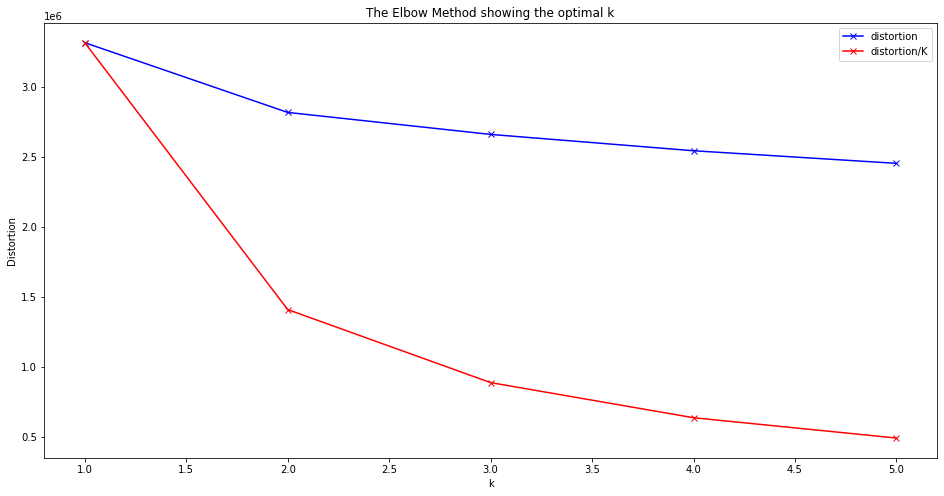

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', label='distortion')
plt.plot(K, distortions_k, 'rx-', label='distortion/K')
plt.legend()
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K-means fit

In [75]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(answers)

In [76]:
df['group']=kmeans.labels_

In [22]:
df.head()

gender  postnr   region  Q1_2_covid_is_threat  Q2_1_easy_to_follow_advice  \
0    Man    2830  Capital              4.796778                         5.0   
1  Woman    4654  Zealand              7.000000                         7.0   
2  Woman    7451  Central              7.000000                         7.0   
3    Man    4700  Zealand              6.000000                         1.0   
4    Man    4000  Zealand              5.000000                         1.0   

   Q2_2_can_follow_advice_if_wanted  Q2_3_if_follow_advice_safe  \
0                               7.0                         4.0   
1                               7.0                         5.0   
2                               7.0                         7.0   
3                               7.0                         2.0   
4                               1.0                         2.0   

   Q2_4_if_follow_advice_others_safe  \
0                                7.0   
1                                7.0   
2                                7.0   
3                                1.0   
4                                1.0   

   Q2_5_follow_advice_relationships_impared  Q2_6_follow_advice_life_degraded  \
0                                       4.0                               5.0   
1                                       6.0                               5.0   
2                                       4.0                               3.0   
3                                       7.0                               4.0   
4                                       2.0                               2.0   

   ...  Q14_ocupation_unemployed  Q14_ocupation_employee_public  \
0  ...                         0                              1   
1  ...                         0                              1   
2  ...                         0                              1   
3  ...                         0                              0   
4  ...                         0                              0   

   Q14_ocupation_self_employed  Q14_ocupation_student  Q14_ocupation_other  \
0                            0                      0                    0   
1                            0                      0                    0   
2                            0                      0                    0   
3                            0                      0                    0   
4                            0                      0                    1   

   Q15_economic_spectrum  Q15_social_spectrum  Q16_economic_spectrum  \
0                    2.0                  4.0                    4.0   
1                    2.0                  4.0                    2.0   
2                    NaN                  NaN                    NaN   
3                    NaN                  NaN                    NaN   
4                    2.0                  4.0                    NaN   

   Q16_social_spectrum  group  
0                  2.0      1  
1                  4.0      1  
2                  NaN      1  
3                  NaN      1  
4                  NaN      0  

[5 rows x 57 columns]

# Analysis

## Groups Description

In [77]:
groups_def = pd.DataFrame(data=scaler.inverse_transform(kmeans.cluster_centers_), columns=behaviour_cols)
groups_def

Q1_2_covid_is_threat  Q2_1_easy_to_follow_advice  \
0              5.208174                    5.919618   
1              4.051690                    4.633207   

   Q2_2_can_follow_advice_if_wanted  Q2_3_if_follow_advice_safe  \
0                          6.379381                    5.924166   
1                          5.273687                    4.534368   

   Q2_4_if_follow_advice_others_safe  \
0                           6.473796   
1                           5.240142   

   Q2_5_follow_advice_relationships_impared  Q2_6_follow_advice_life_degraded  \
0                                  4.253926                          3.247492   
1                                  4.345101                          3.866647   

   Q3_1_aware_hand_hygiene  Q3_2_avoid_contact  Q3_3_ensure_frequent_cleaning  \
0                 6.663314            6.239682                       5.700782   
1                 5.649539            4.214326                       4.160153   

   ...  Q6_3_others_can_avoid_spreading  Q6_5_ownership_of_advice  \
0  ...                         4.712536                  6.206649   
1  ...                         4.178768                  4.550287   

   Q6_6_clear_information_on_advice_reason  \
0                                 5.900820   
1                                 4.136967   

   Q6_7_advice_limits_daily_activities  Q6_9_trust_political_strategy  \
0                             4.303009                       5.681270   
1                             4.071544                       3.852146   

   Ny1_nr_times_wearing_masks_last_week  Q4_1_nr_contact_nonhouse_family  \
0                              2.051352                         1.399090   
1                              1.709675                         1.897675   

   Q4_2_nr_contact_colleagues  Q4_3_nr_contact_friends  \
0                    1.227952                 1.367435   
1                    2.423079                 2.686341   

   Q4_4_nr_contact_strangers  
0                   2.127314  
1                   4.062617  

[2 rows x 27 columns]

## Group Distance

In [78]:
df_dict = []
for i, day in  df[behaviour_cols + ['date', 'group']].groupby(['date']):
     groups_dist = np.abs(day[day['group']== 0].mean() - day[day['group']== 1].mean())
     dist = np.linalg.norm(groups_dist.values, ord=1)
     df_dict.append({'time':i, 'distance': dist})
dist_df = pd.DataFrame(df_dict)

/tmp/ipykernel_24274/4239959398.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [79]:
dist_df['dist_smooth'] = dist_df.distance.rolling(7).mean()

In [80]:
fig = px.line(dist_df,x='time', y=['distance', 'dist_smooth'])
fig.show()

## Groups daily distribution

In [81]:
groups_percentage = df.groupby(['date','group'],as_index=False)['gender'].count()
groups_percentage

date  group  gender
0     2020-05-29      0      38
1     2020-05-29      1      16
2     2020-05-30      0     217
3     2020-05-30      1      80
4     2020-05-31      0     122
...          ...    ...     ...
1099  2021-11-29      1      49
1100  2021-11-30      0      86
1101  2021-11-30      1      51
1102  2021-12-01      0      87
1103  2021-12-01      1      60

[1104 rows x 3 columns]

In [82]:
def normalize(row):
  sum = groups_percentage[groups_percentage['date']==row['date']]['gender'].sum()
  return row['gender']/sum

groups_percentage['percentage'] = groups_percentage.apply(lambda x: normalize(x), axis=1)
groups_percentage.drop(columns='gender',inplace=True)
groups_percentage

date  group  percentage
0     2020-05-29      0    0.703704
1     2020-05-29      1    0.296296
2     2020-05-30      0    0.730640
3     2020-05-30      1    0.269360
4     2020-05-31      0    0.616162
...          ...    ...         ...
1099  2021-11-29      1    0.411765
1100  2021-11-30      0    0.627737
1101  2021-11-30      1    0.372263
1102  2021-12-01      0    0.591837
1103  2021-12-01      1    0.408163

[1104 rows x 3 columns]

In [ ]:
# for pandas version "1.4.0, we pray for the day colab updates"
'''groups_per_day = df[['date','group']].groupby(['date']).value_counts(normalize=True)
groups_percentage = groups_per_day.index.to_frame(index=False)
groups_percentage['percentage'] = groups_per_day.values
groups_percentage'''

In [83]:
observations = pd.read_csv('data/observations_30012022.csv',sep=';', decimal=',', encoding='utf-8')

In [84]:
sliced_observations = observations.iloc[92:643]
fig = px.line(sliced_observations, x="Date", y=sliced_observations.columns[2:])
fig.show()

In [85]:
fig = px.line(groups_percentage, x="date", y="percentage", color='group', title='Group daily distribution')
fig.show()

## Percentage and distance comparison

In [86]:
dist_df['percentage'] = groups_percentage[groups_percentage['group'] == 1].percentage.reset_index(drop=True)

In [87]:
dist_df['percentage_smooth'] = dist_df['percentage'].rolling(7).mean()

In [89]:
# import graph_objects from plotly package
import plotly.graph_objects as go

# import make_subplots function from plotly.subplots
# to make grid of plots
from plotly.subplots import make_subplots

# use specs parameter in make_subplots function
# to create secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# plot a scatter chart by specifying the x and y values
# Use add_trace function to specify secondary_y axes.
fig.add_trace(
	go.Scatter(x=dist_df.time, y=dist_df.dist_smooth, name="Distance"),
	secondary_y=False)

# Use add_trace function and specify secondary_y axes = True.
fig.add_trace(
	go.Scatter(x=dist_df.time, y=dist_df.percentage_smooth, name="Percentage"),
	secondary_y=True,)

# Adding title text to the figure
fig.update_layout(
	title_text="Cluster percentage compared to cluster distance"
)

# Naming x-axis
fig.update_xaxes(title_text="Day")

# Naming y-axes
fig.update_yaxes(title_text="Euclidean distance", secondary_y=False)
fig.update_yaxes(title_text="%", secondary_y=True)


## Group non-behavioural Analysis

In [90]:
group_analysis = df[non_behaviour_cols+['group','date']].copy()
group_analysis.head()

gender  postnr   region  season  Q10_education  Q11_nr_members_household  \
0    Man    2830  Capital     4.0              8                         1   
1  Woman    4654  Zealand     2.0              3                         1   
2  Woman    7451  Central     2.0              4                         1   
3    Man    4700  Zealand     3.0              3                         1   
4    Man    4000  Zealand     4.0              4                         2   

   Q12_nr_children_household  age_num  Q14_ocupation_pensioner  \
0                          0        6                        0   
1                          0        5                        0   
2                          0        5                        0   
3                          0        5                        1   
4                          1        4                        0   

   Q14_ocupation_employee_private  ...  Q7_3_last_week_sore_throat  \
0                               0  ...                         0.0   
1                               0  ...                         0.0   
2                               0  ...                         0.0   
3                               0  ...                         0.0   
4                               0  ...                         0.0   

   Q7_4_last_week_no_smell_taste  Q7_5_last_week_shortness_breath  \
0                            0.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   Q2020NovNy1  Q2020NovNy2_tested_positive  Q2020NovNy3  Q2020NovNy4  \
0          NaN                          NaN          0.0          NaN   
1          NaN                          NaN          NaN          NaN   
2          0.0                          0.0          0.0          NaN   
3          NaN                          NaN          0.0          NaN   
4          0.0                          0.0          0.0          NaN   

         date  group        date  
0  2021-01-03      0  2021-01-03  
1  2020-07-31      0  2020-07-31  
2  2021-06-05      0  2021-06-05  
3  2020-11-06      0  2020-11-06  
4  2020-12-09      1  2020-12-09  

[5 rows x 31 columns]

In [91]:
groups_def

Q1_2_covid_is_threat  Q2_1_easy_to_follow_advice  \
0              5.208174                    5.919618   
1              4.051690                    4.633207   

   Q2_2_can_follow_advice_if_wanted  Q2_3_if_follow_advice_safe  \
0                          6.379381                    5.924166   
1                          5.273687                    4.534368   

   Q2_4_if_follow_advice_others_safe  \
0                           6.473796   
1                           5.240142   

   Q2_5_follow_advice_relationships_impared  Q2_6_follow_advice_life_degraded  \
0                                  4.253926                          3.247492   
1                                  4.345101                          3.866647   

   Q3_1_aware_hand_hygiene  Q3_2_avoid_contact  Q3_3_ensure_frequent_cleaning  \
0                 6.663314            6.239682                       5.700782   
1                 5.649539            4.214326                       4.160153   

   ...  Q6_3_others_can_avoid_spreading  Q6_5_ownership_of_advice  \
0  ...                         4.712536                  6.206649   
1  ...                         4.178768                  4.550287   

   Q6_6_clear_information_on_advice_reason  \
0                                 5.900820   
1                                 4.136967   

   Q6_7_advice_limits_daily_activities  Q6_9_trust_political_strategy  \
0                             4.303009                       5.681270   
1                             4.071544                       3.852146   

   Ny1_nr_times_wearing_masks_last_week  Q4_1_nr_contact_nonhouse_family  \
0                              2.051352                         1.399090   
1                              1.709675                         1.897675   

   Q4_2_nr_contact_colleagues  Q4_3_nr_contact_friends  \
0                    1.227952                 1.367435   
1                    2.423079                 2.686341   

   Q4_4_nr_contact_strangers  
0                   2.127314  
1                   4.062617  

[2 rows x 27 columns]

In [92]:
group_analysis.groupby(['group']).mean()

postnr    season  Q10_education  Q11_nr_members_household  \
group                                                                   
0      5651.935634  2.563082       4.100064                  1.801085   
1      5587.562400  2.438149       4.234743                  1.922629   

       Q12_nr_children_household   age_num  Q14_ocupation_pensioner  \
group                                                                 
0                       0.549653  3.872027                 0.285626   
1                       0.720069  2.955909                 0.379383   

       Q14_ocupation_employee_private  Q14_ocupation_unemployed  \
group                                                             
0                            0.214355                  0.033131   
1                            0.228754                  0.028891   

       Q14_ocupation_employee_public  ...  Q16_social_spectrum  \
group                                 ...                        
0                           0.332768  ...             3.349559   
1                           0.151360  ...             3.073063   

       Q7_1_last_week_fever  Q7_2_last_week_cough  Q7_3_last_week_sore_throat  \
group                                                                           
0                  0.017390              0.078322                    0.066723   
1                  0.023558              0.112620                    0.097079   

       Q7_4_last_week_no_smell_taste  Q7_5_last_week_shortness_breath  \
group                                                                   
0                           0.016708                         0.016708   
1                           0.021139                         0.020445   

       Q2020NovNy1  Q2020NovNy2_tested_positive  Q2020NovNy3  Q2020NovNy4  
group                                                                      
0         0.027017                     0.017066     0.043398     2.737365  
1         0.034035                     0.012830     0.035469     2.511568  

[2 rows x 26 columns]

In [94]:
interesting_cols = [
        'Q1_2_covid_is_threat',
       'Q2_1_easy_to_follow_advice', 'Q2_2_can_follow_advice_if_wanted',
       'Q2_3_if_follow_advice_safe', 'Q2_4_if_follow_advice_others_safe',
       'Q2_5_follow_advice_relationships_impared',
       'Q2_6_follow_advice_life_degraded', 'Q3_1_aware_hand_hygiene',
       'Q3_2_avoid_contact', 'Q3_3_ensure_frequent_cleaning',
       'Q3_4_avoid_risk_groups', 'Q3_5_keep_distance', 'Q3_6_avoid_crowds',
       'Q3_7_minimize_activities_w_contact', 'Q5_4_yourself_kept_distance',
       'Q5_5_feel_urge_scold', 'Q6_2_advices_important',
       'Q6_3_others_can_avoid_spreading', 'Q6_5_ownership_of_advice',
       'Q6_6_clear_information_on_advice_reason',
       'Q6_7_advice_limits_daily_activities', 'Q6_9_trust_political_strategy',
       'Ny1_nr_times_wearing_masks_last_week', 'Q10_education',
       'Q4_3_nr_contact_friends', 'Q4_4_nr_contact_strangers', 'age_num',
       'Q15_economic_spectrum', 'Q15_social_spectrum',
       'Q16_economic_spectrum', 'Q16_social_spectrum'
]

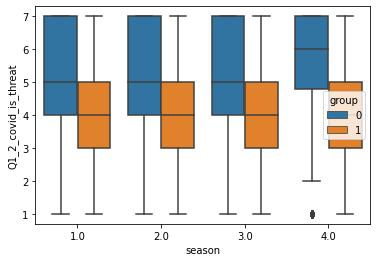

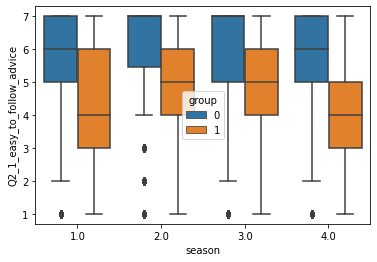

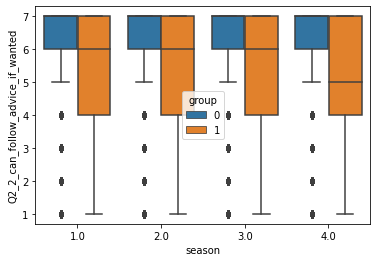

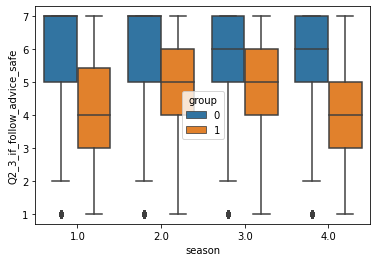

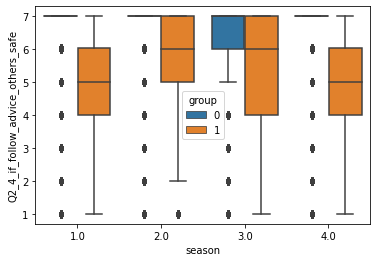

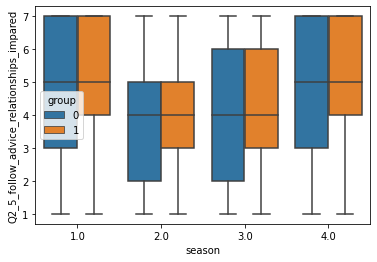

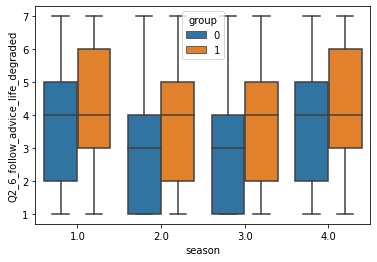

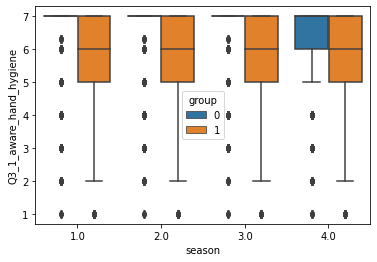

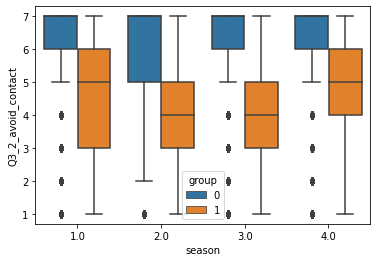

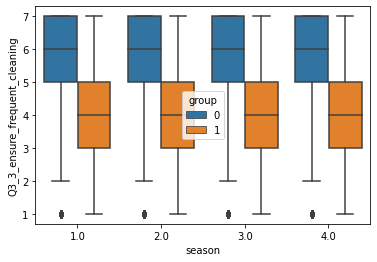

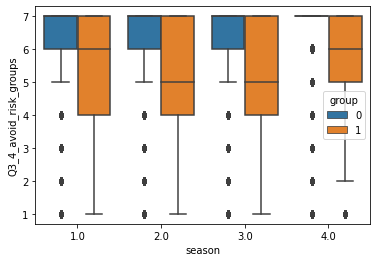

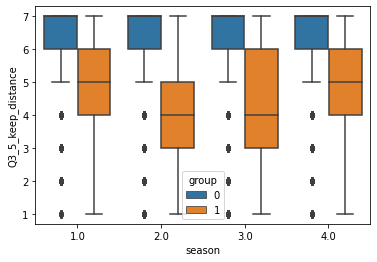

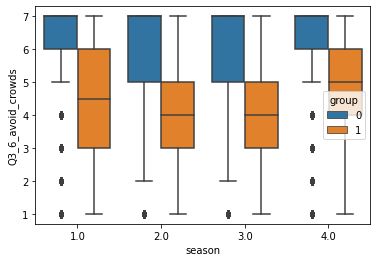

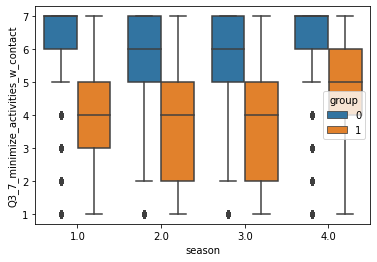

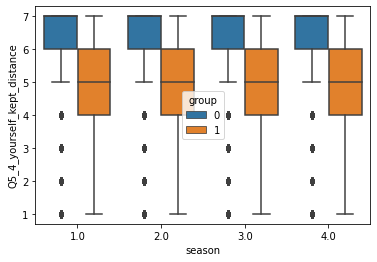

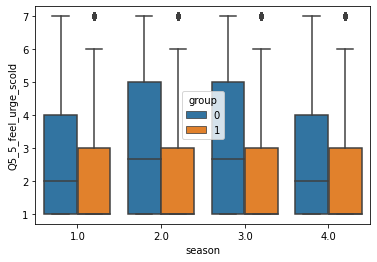

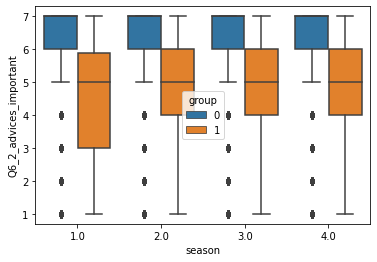

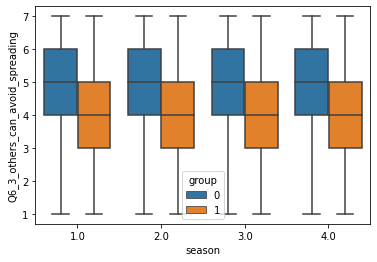

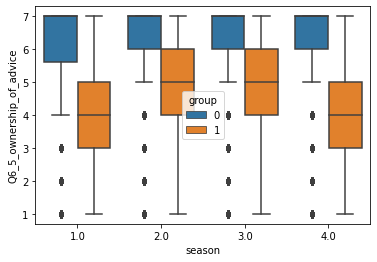

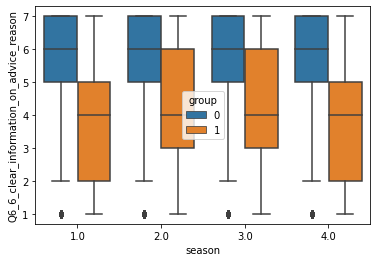

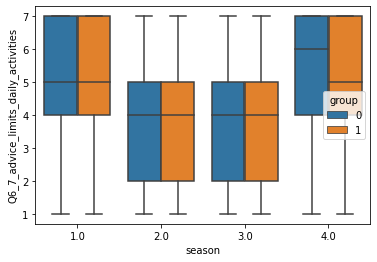

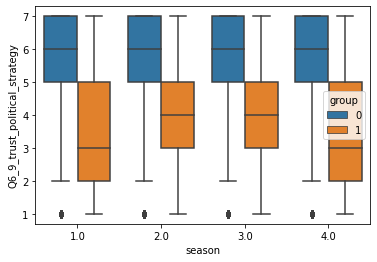

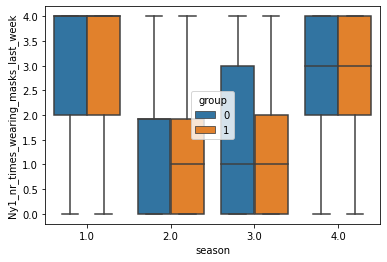

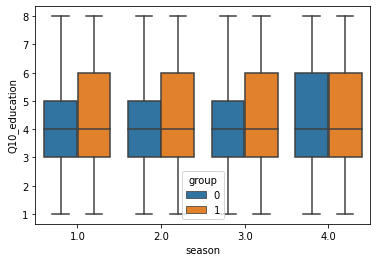

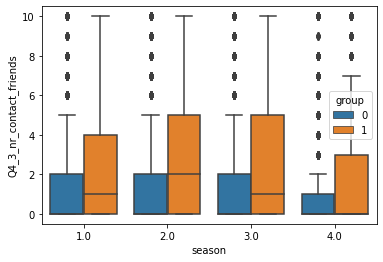

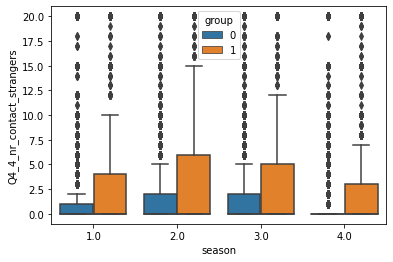

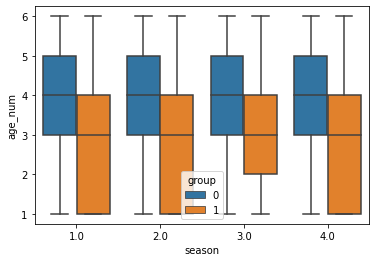

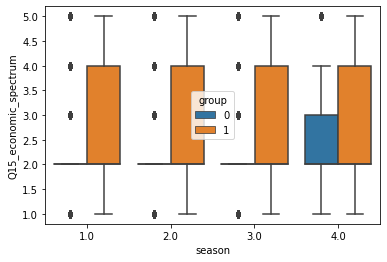

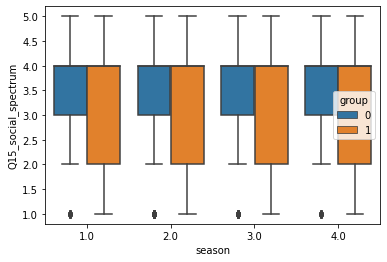

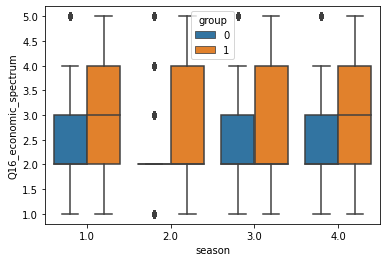

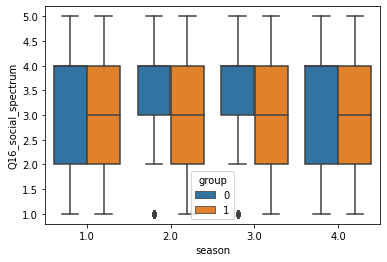

In [95]:
for i in interesting_cols:
  sns.boxplot(x="season", y=i, hue="group",data=df)
  plt.show()

## Change political opinion

### Economic

In [96]:
for i, eco in df.groupby('Q15_economic_spectrum'):
    print(f'From {eco.shape[0]} People that Voted {i} changed to:')
    px.histogram(eco, x='Q16_economic_spectrum', color='group', barmode='overlay', histnorm='percent').show()

From 7018 People that Voted 1.0 changed to:


From 61410 People that Voted 2.0 changed to:


From 5421 People that Voted 3.0 changed to:


From 18467 People that Voted 4.0 changed to:


From 2601 People that Voted 5.0 changed to:


### Social

In [97]:
for i, eco in df.groupby('Q15_social_spectrum'):
    print(f'From {eco.shape[0]} People that Voted {i} changed to:')
    px.histogram(eco, x='Q16_social_spectrum', color='group', barmode='overlay', histnorm='percent').show()

From 292 People that Voted 1.0 changed to:


From 23542 People that Voted 2.0 changed to:


From 14480 People that Voted 3.0 changed to:


From 54194 People that Voted 4.0 changed to:


From 2409 People that Voted 5.0 changed to:


## Daily average

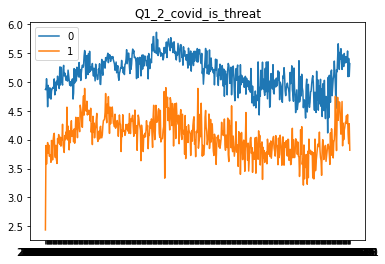

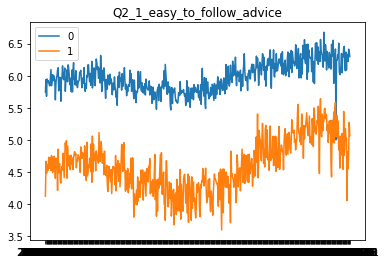

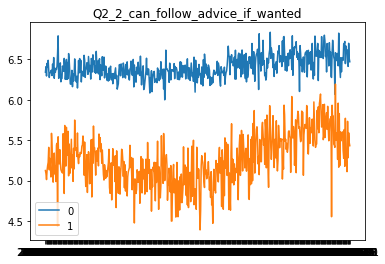

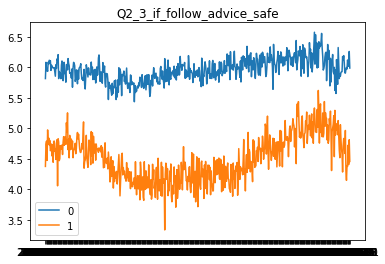

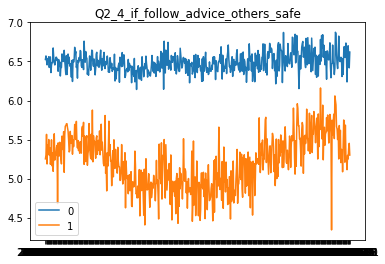

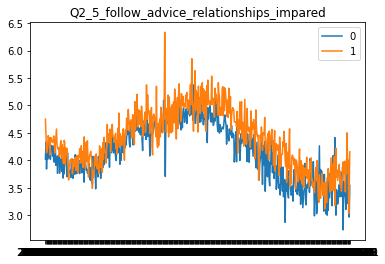

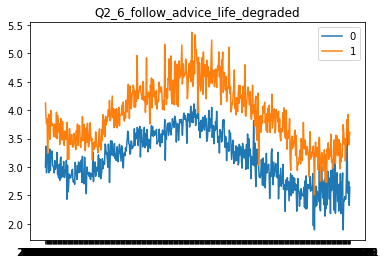

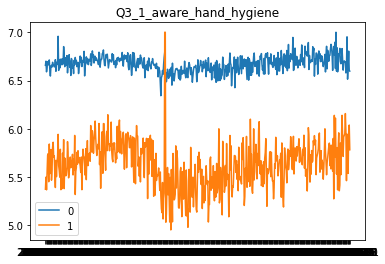

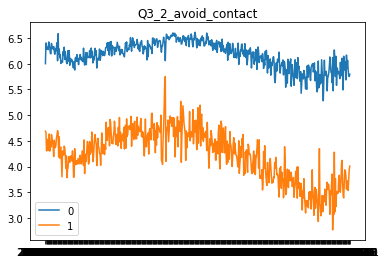

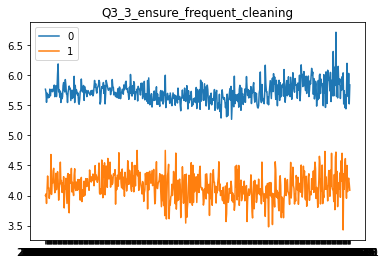

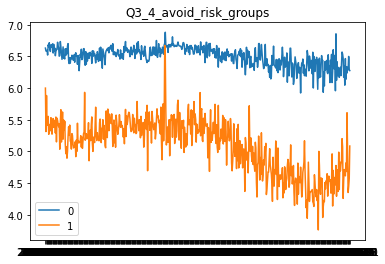

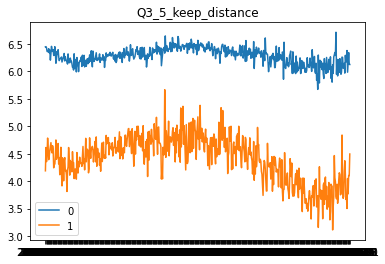

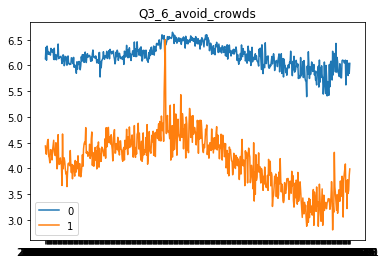

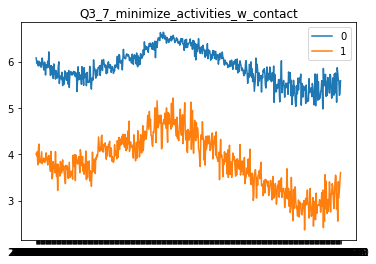

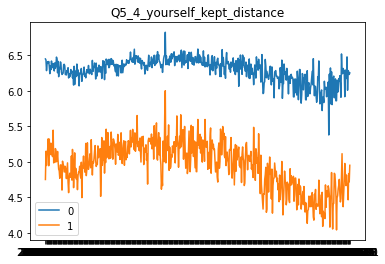

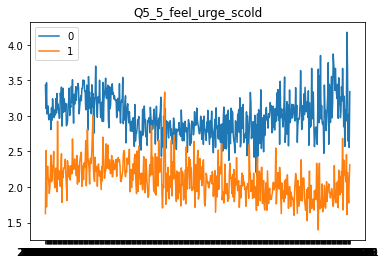

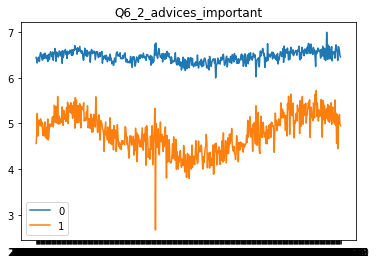

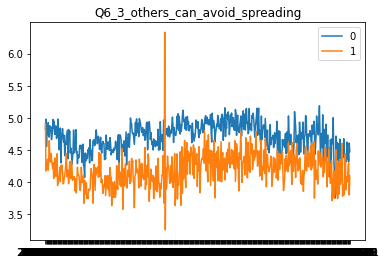

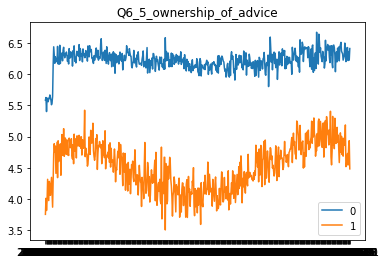

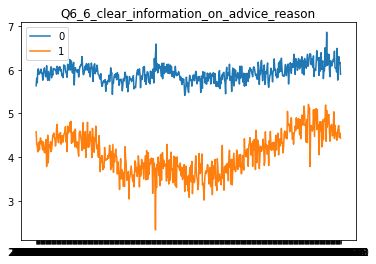

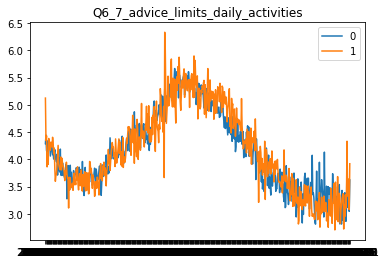

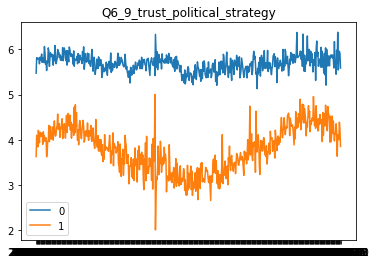

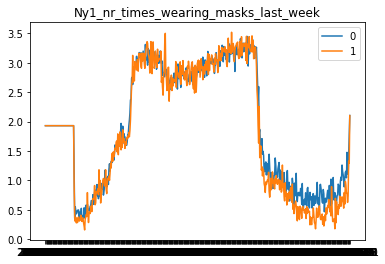

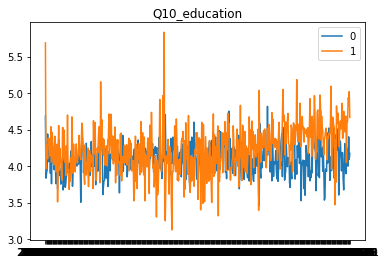

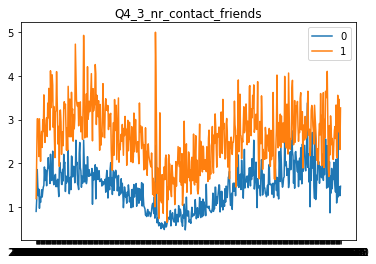

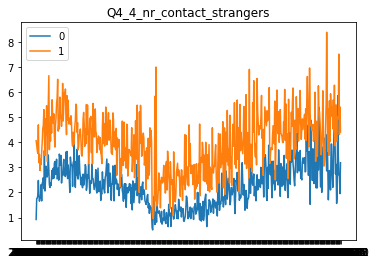

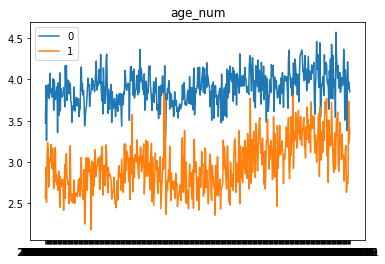

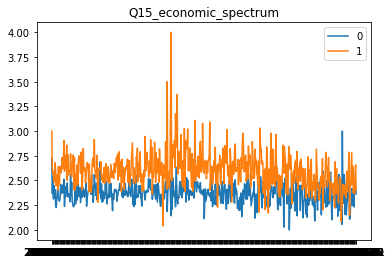

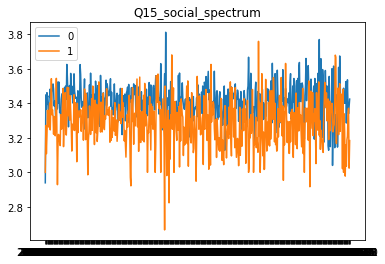

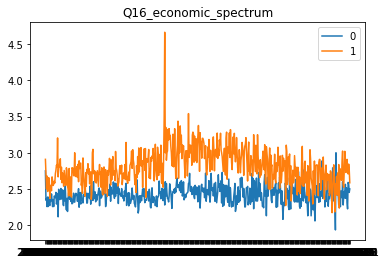

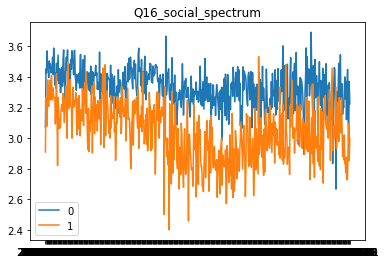

In [98]:
df_daily_average = df.groupby(['date','group']).mean().reset_index()
df_daily_average_0 = df_daily_average[df_daily_average.group == 0]
df_daily_average_1 = df_daily_average[df_daily_average.group == 1]
for col in interesting_cols:
    plt.plot(df_daily_average_0.date,df_daily_average_0[col], label='0')
    plt.plot(df_daily_average_1.date,df_daily_average_1[col], label='1')
    plt.legend()
    plt.title(col)
    plt.show()

## Ocupation distribution

In [99]:
df[['Q14_ocupation_pensioner', 'Q14_ocupation_employee_private',
       'Q14_ocupation_unemployed', 'Q14_ocupation_employee_public',
       'Q14_ocupation_self_employed', 'Q14_ocupation_student',
       'Q14_ocupation_other']].sum()/ df[['Q14_ocupation_pensioner', 'Q14_ocupation_employee_private',
                                          'Q14_ocupation_unemployed', 'Q14_ocupation_employee_public',
                                          'Q14_ocupation_self_employed', 'Q14_ocupation_student',
                                          'Q14_ocupation_other']].sum().sum()

Q14_ocupation_pensioner           0.319021
Q14_ocupation_employee_private    0.219484
Q14_ocupation_unemployed          0.031621
Q14_ocupation_employee_public     0.268153
Q14_ocupation_self_employed       0.054075
Q14_ocupation_student             0.072450
Q14_ocupation_other               0.035195
dtype: float64

## PCA visualization

### PCA

In [138]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array(answers)
pca = PCA(n_components=3)
answers_reduced = pca.fit_transform(X)

In [154]:
df_reduced = pd.DataFrame(answers_reduced,columns=['PC1','PC2', 'PC3'])
df_reduced['group'] = kmeans.labels_
df_reduced['date'] = df['date']

PC1       PC2       PC3  group        date
0      -0.527462 -0.398430 -0.283861      0  2021-01-03
1      -0.719028  0.068639 -0.153891      0  2020-07-31
2      -0.737448  0.268662  0.180575      0  2021-06-05
3       0.161363 -0.725710  0.615878      0  2020-11-06
4       1.224053 -0.663932  1.657392      1  2020-12-09
...          ...       ...       ...    ...         ...
122824  0.196142 -0.793565  0.461920      1  2020-11-29
122825 -0.274448  0.506448  0.268726      0  2021-08-26
122826  0.637056  0.045796 -0.206516      1  2020-12-05
122827  0.437208 -0.084418  0.476518      1  2021-08-28
122828  0.507555 -0.308593  0.065803      1  2020-11-03

[122829 rows x 5 columns]

In [184]:
pca.components_[0]

array([-0.17960855, -0.19526362, -0.1588181 , -0.21118825, -0.18447066,
        0.03360517,  0.11371864, -0.15007251, -0.28408641, -0.22625711,
       -0.20230696, -0.26861618, -0.29350846, -0.30431287, -0.20118533,
       -0.13473126, -0.23802835, -0.07966597, -0.24484745, -0.25947991,
       -0.01414871, -0.27699233, -0.06964703,  0.05595917,  0.10272476,
        0.1144483 ,  0.08929145])

### 2D

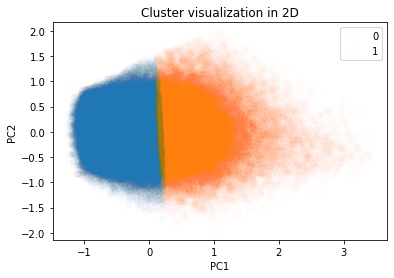

In [152]:
group_0 = df_reduced[df_reduced.group == 0]
group_1 = df_reduced[df_reduced.group == 1]

plt.scatter(group_0['PC1'],group_0['PC2'],alpha=0.01,label='0')
plt.scatter(group_1['PC1'],group_1['PC2'],alpha=0.01,label='1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster visualization in 2D')
plt.legend()
plt.show()

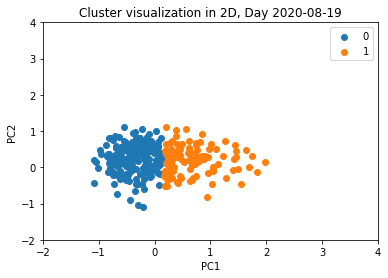

KeyboardInterrupt: 

In [188]:
import time
from IPython.display import clear_output
group_0 = df_reduced[df_reduced.group == 0]
group_1 = df_reduced[df_reduced.group == 1]
for i in df_reduced.date.sort_values().unique():
    plt.scatter(group_0[group_0.date == i]['PC1'],group_0[group_0.date == i]['PC2'],alpha=1,label='0')
    plt.scatter(group_1[group_1.date == i]['PC1'],group_1[group_1.date == i]['PC2'],alpha=1,label='1')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(-2,4)
    plt.ylim(-2,4)
    plt.title(f'Cluster visualization in 2D, Day {i}')
    plt.legend()
    plt.show()

    time.sleep(0.2)
    clear_output()


# 3D


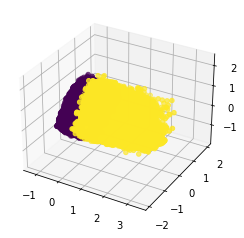

In [145]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_reduced['PC1'], df_reduced['PC2'], df_reduced['PC3'], c=df_reduced['group'])